<a href="https://colab.research.google.com/github/bhagyamchandrapati/Deep-Learning/blob/main/pytorch_for_deep_learning_linear_regression_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [104]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:3], y[:3]

(tensor([[0.0000],
         [0.0200],
         [0.0400]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280]]))

In [105]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [106]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 12});

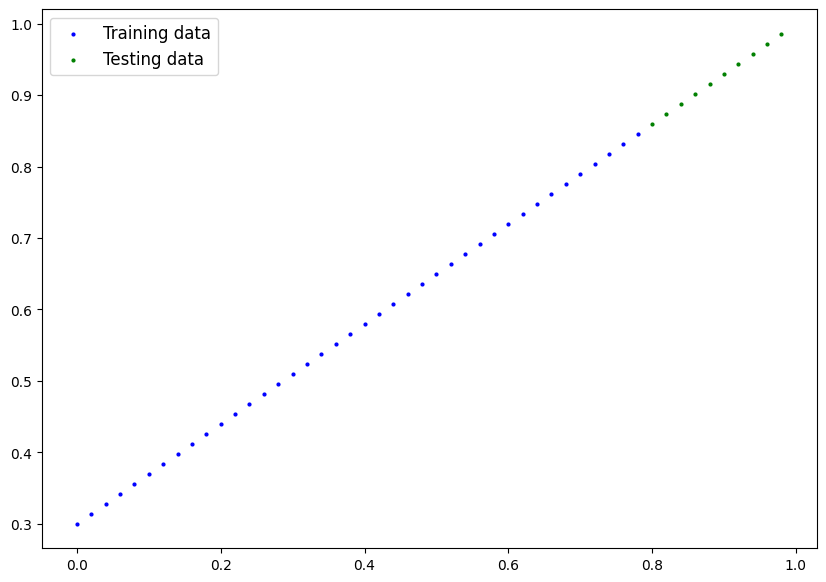

In [107]:
plot_predictions();

In [108]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [109]:
torch.manual_seed(42)
model = LinearRegressionModel()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


In [110]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [111]:
with torch.inference_mode():
    y_preds = model(X_test)

In [112]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


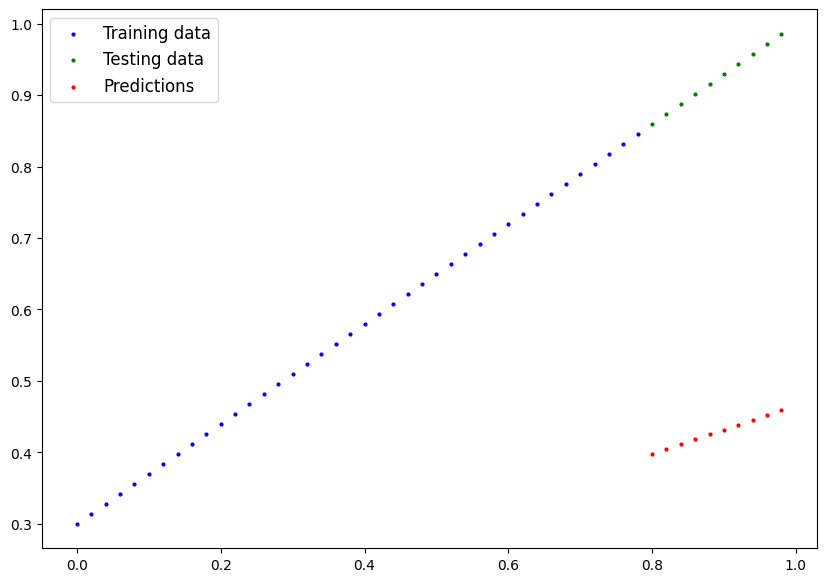

In [113]:
plot_predictions(predictions=y_preds)

In [114]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [121]:
#model = torch.nn.Linear(in_features=1, out_features=1)
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.0000001,weight_decay=0.01)


NameError: name 'self' is not defined

In [116]:
torch.manual_seed(42)
epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred, y_test.type(torch.float))
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.49453607201576233 
Epoch: 10 | MAE Train Loss: 0.31287503242492676 | MAE Test Loss: 0.49452728033065796 
Epoch: 20 | MAE Train Loss: 0.31285718083381653 | MAE Test Loss: 0.4945050776004791 
Epoch: 30 | MAE Train Loss: 0.3128277659416199 | MAE Test Loss: 0.4944693446159363 
Epoch: 40 | MAE Train Loss: 0.31278690695762634 | MAE Test Loss: 0.49442023038864136 
Epoch: 50 | MAE Train Loss: 0.3127344846725464 | MAE Test Loss: 0.49435752630233765 
Epoch: 60 | MAE Train Loss: 0.3126705288887024 | MAE Test Loss: 0.49428144097328186 
Epoch: 70 | MAE Train Loss: 0.31259506940841675 | MAE Test Loss: 0.49419188499450684 
Epoch: 80 | MAE Train Loss: 0.31250810623168945 | MAE Test Loss: 0.49408888816833496 
Epoch: 90 | MAE Train Loss: 0.31240957975387573 | MAE Test Loss: 0.4939723610877991 
Epoch: 100 | MAE Train Loss: 0.31229954957962036 | MAE Test Loss: 0.49384230375289917 
Epoch: 110 | MAE Train Loss: 0.3121780455112457 | MAE Test L

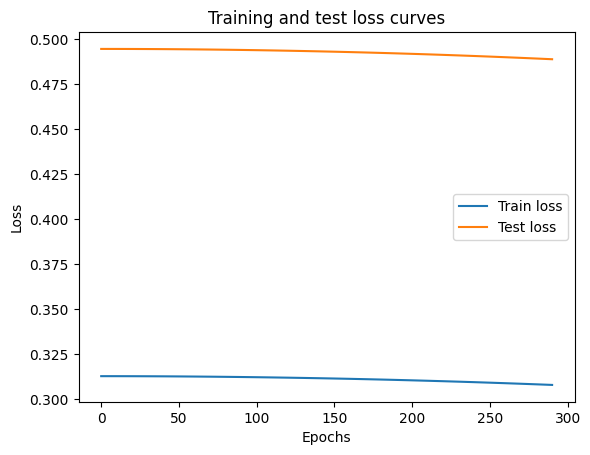

In [117]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [118]:
print("The model learned from the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned from the following values for weights and bias:
OrderedDict([('weights', tensor([0.3385])), ('bias', tensor([0.1333]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [119]:
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([[0.4041],
        [0.4109],
        [0.4176],
        [0.4244],
        [0.4312],
        [0.4379],
        [0.4447],
        [0.4515],
        [0.4582],
        [0.4650]])

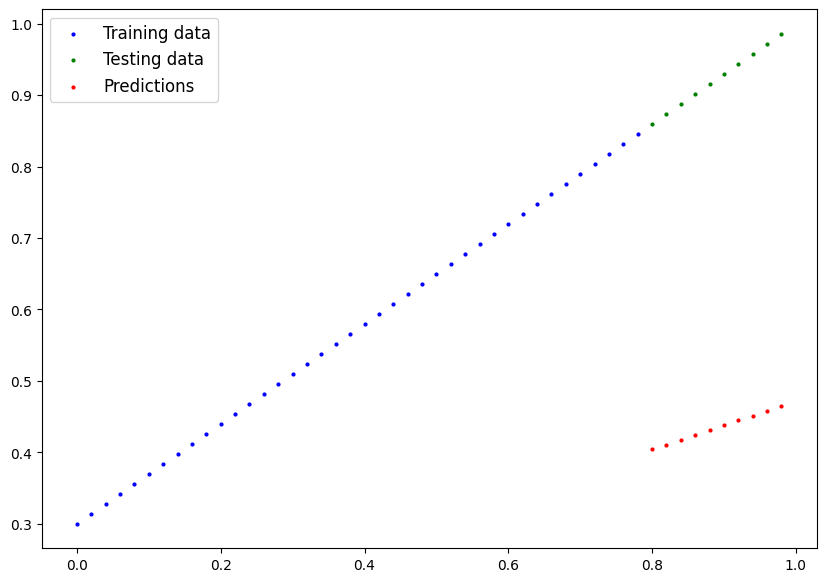

In [120]:
plot_predictions(predictions=y_preds)